In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from larcv import larcv
%matplotlib inline

In [2]:
filename = '/Users/mdeltutt/Downloads/out_sbnd_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i1000.h5.pkl'
df_3d = pd.read_pickle(filename)

filename = '/Users/mdeltutt/Downloads/out_sbnd_2d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i600.h5.pkl'
df_2d = pd.read_pickle(filename)

from tools import *

In [3]:
# import scipy.stats

# def pot_scale_factor(this_pot, target = 1e20):
    
#     return target / this_pot

# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

# def efficiency(num, den, num_w=None, den_w=None, n_bins=10, limits=None, conf_level=None):
#     '''
#     Calculates the efficiency given two populations: one containig 
#     the totatility of the events, and one containing only events 
#     that pass the selection.
#     It uses a frequentist approach to evaluate the uncertainty.
#     Other methods are to be implemented.
    
#     Arguments:
#         num {tuple} -- The totality of the events
#         den {tuple} -- The events that pass the selection
#         num_w {tuple} -- Optional, the weight for every event
#         den_w {tuple} -- Optional, the weight for every selected event
#         n_bins {int} -- Optional, the number of bins
#         limits {tuple} -- Optional, the lower and upper limits of the bins 
#         conf_level {float} -- Optional, the confidence level to be used
        
#     Outputs:
#         eff {tuple} -- The efficiency per bin
#         unc_low {tuple} -- The lower uncertainty per bin
#         unc_up {tuple} -- The upper uncertainty per bin
#         bins {tuple} -- The bin edges
#         bins_mid {tuple} -- The mid points of the bins
#         x_bar {tuple} -- The uncertainty along the x axis
#     '''
    
#     if num_w is None:
#         num_w = [1.] * len(num)
        
#     if den_w is None:
#         den_w = [1.] * len(den)
        
#     if conf_level is None:
#         conf_level = 0.682689492137
        
#     if limits is None:
#         x_min=0
#         x_max=10
#     else:
#         x_min=limits[0]
#         x_max=limits[1]

#     num = np.asarray(num, dtype=np.float32)
#     num_w = np.asarray(num_w, dtype=np.float32)
#     den = np.asarray(den, dtype=np.float32)
#     den_w = np.asarray(den_w, dtype=np.float32)

#     bins = np.linspace(x_min, x_max, n_bins)

#     num_h, _    = np.histogram(num, bins=bins)
#     num_w_h, _  = np.histogram(num, weights=num_w, bins=bins)
#     num_w2_h, _ = np.histogram(num, weights=num_w**2, bins=bins)

#     den_h, _    = np.histogram(den, bins=bins)
#     den_w_h, _  = np.histogram(den, weights=den_w, bins=bins)
#     den_w2_h, _ = np.histogram(den, weights=den_w**2, bins=bins)

#     eff = num_w_h / den_w_h

#     variance = (num_w2_h * (1. - 2 * eff) + den_w2_h * eff *eff ) / ( den_w_h * den_w_h)
#     sigma = np.sqrt(variance)
#     prob = 0.5 * (1. - conf_level)
#     delta = - scipy.stats.norm.ppf(prob) * sigma

#     unc_up = []
#     unc_low = []

#     for eff_i, delta_i in zip(eff, delta):
#         if eff_i - delta_i < 0:
#             unc_low.append(eff_i)
#         else:
#             unc_low.append(delta_i)
            
#         if eff_i + delta_i > 1:
#             unc_up.append(1. - eff_i)
#         else:
#             unc_up.append(delta_i)
            
            
#     bins_mid = [bins[i]+(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
#     x_bar = 0.5*(bins[-1]-bins[0])/len(bins)
    
#     return eff, unc_low, unc_up, bins, bins_mid, x_bar


# def plot_histogram(ax, data, option='simple', weights=None, n_bins=10, limits=None, label=None):
#     '''
#     Plots a histogram given values.
    
#     Arguments:
#         ax {ax} -- The axes to use for plotting
#         data {tuple} -- The data to be histogrammed
#         option {str} -- Optional, the option for plotting
#         weights {tuple} -- Optional, The weights
#         n_bins {int} -- Optional, the number of bins
#         limits {tuple} -- Optional, the lower and upper limits of the bins
#         label {tuple} -- Optional, the labels
        
#     Options:
#         simple -- With filled error bars
#         stacked -- Stacked histograms
#     '''
    
#     data_h, err, bins, bins_mid = histogram_helper(data, weights, n_bins, limits)
    
#     widths = bins[1:] - bins[:-1]

#     loopable_data_h = []
#     loopable_err = []
#     if isinstance(data_h[0], list) or isinstance(data_h[0], np.ndarray):
#         loopable_data_h = data_h
#         loopable_err = err
#     else:
#         loopable_data_h.append(data_h)
#         loopable_err.append(err)
        
#     if label is None:
#         label = ['empty'] * len(data)
#     else:
#         if len(label) != len(data):
#             raise ('Length of data and label has to be the same.')
        
#     lower = np.zeros(len(loopable_data_h[0]))
        
#     for d, e, l in zip(loopable_data_h, loopable_err, label):
                
#         d = np.append(d, d[-1])
#         e = np.append(e, e[-1])
        
#         if option == 'simple':
#             ax.step(
#                 bins,
#                 d,
# #             color="C" + str(i),
#                 where="post",
#                 label=l,
#             )
#             ax.fill_between(
#                 bins, d - e, d + e, alpha=0.3, step="post", 
# #             color="C" + str(i)
#             )
    
    
#         elif option == 'stacked':
#             ax.bar(bins_mid,
#                     d[:-1],
#                     lw=2,
#                     width=widths,
#                     bottom=lower,
#                     label=l)
#             lower += d[:-1]
#         else:
#             raise('Option' + option + 'not recognized.')

#     # Uncertainty bars for stacked histograms
#     if option == 'stacked':
        
#         # Unify all the data, together with their weights
#         if isinstance(data[0], list) or isinstance(data_h[0], np.ndarray):            
#             d = data[0]
#             w = weights[0]
#             for i in range(1, len(data)):
#                 d = np.append(d, data[i])
#                 w = np.append(w, weights[i])
#         else:
#             d = data
#             w = weights
        
#         # Make a histogram of the total data
#         data_tot, err_tot, _, _ = histogram_helper(d, w, n_bins, limits)
        
#         # Plot the histogram as a hashed histogram
#         for m, v, e, w in zip(bins_mid, data_tot, err_tot, widths):
#             ax.add_patch(
#                     patches.Rectangle(
#                     (m - w / 2, v - e),
#                     w,
#                     2 * e,
#                     hatch="\\\\\\\\\\",
#                     Fill=False,
#                     linewidth=0,
#                     alpha=0.4,
#                 )
#             )
#     return
    
    
# def histogram_helper(data, weights=None, n_bins=10, limits=None):
#     '''
#     Makes a histogram of values.
    
#     Arguments:
#         data {tuple} -- The data to be histogrammed
#         weights {tuple} -- Optional, The weights
#         n_bins {int} -- Optional, the number of bins
#         limits {tuple} -- Optional, the lower and upper range of the bins 
        
#     Outputs:
#         data_h {tuple} -- The bin content per bin
#         err {tuple} -- The statistical uncertainty per bin
#         bins {tuple} -- The bin edges
#         bins_mid {tuple} -- The mid points of the bins
#     '''
    
#     if limits is None:
#         x_min=0
#         x_max=10
#     else:
#         x_min=limits[0]
#         x_max=limits[1]
        
# #     if weights != 0 and len(data) != len(weights):
# #         raise ('Data and weights must have the same length.')
        
#     bins = np.linspace(x_min, x_max, n_bins+1)
#     bins_mid = [bins[i]+(bins[i+1]-bins[i])/2 for i in range(len(bins)-1)]
        
#     loopable_data = []
#     loopable_weights = []
#     if isinstance(data, list):
#         loopable_data = data
#         loopable_weights = weights
#     else:
#         loopable_data.append(data)
#         loopable_weights.append(weights)
    
#     data_h = []
#     err = []
    
#     for d, w in zip(loopable_data, loopable_weights):
        
#         d = np.asarray(d, dtype=np.float32)
#         w = np.asarray(w, dtype=np.float32)
    
#         if w is None:
#             h, _ = np.histogram(d, bins=bins)
#             e    = np.sqrt(h)
#         else:
#             h, _    = np.histogram(d, weights=w, bins=bins)
#             w2_h, _ = np.histogram(d, weights=w**2, bins=bins)
#             e = np.sqrt(w2_h)
            
#         data_h.append(h)
#         err.append(e)
        
#     if isinstance(data, list):
#         return data_h, err, bins, bins_mid
#     else:
#         return data_h[0], err[0], bins, bins_mid

In [4]:
def make_plots(name, signal_txt, var, str_sig, str_sig_sel, df_3d, df_2d):
    
    sig_df_3d = df_3d.query(str_sig)
    sig_sel_df_3d = df_3d.query(str_sig_sel)

    sig_df_2d = df_2d.query(str_sig)
    sig_sel_df_2d = df_2d.query(str_sig_sel)

    print ('Overall efficiency - 3D:', float(len(sig_sel_df_3d)) / len(sig_df_3d))
    print ('Overall efficiency - 2D:', float(len(sig_sel_df_2d)) / len(sig_df_2d))

    pot_scale_3d = pot_scale_factor(this_pot=np.sum(sig_df_3d['pot']))
    pot_scale_2d = pot_scale_factor(this_pot=np.sum(sig_df_2d['pot']))
    
    sig_df_3d = sig_df_3d.query(var.variable + ' > -9999')
    sig_sel_df_3d = sig_sel_df_3d.query(var.variable + ' > -9999')
    sig_df_2d = sig_df_2d.query(var.variable + ' > -9999')
    sig_sel_df_2d = sig_sel_df_2d.query(var.variable + ' > -9999')


    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,14), sharex=True, sharey=False)

    # 3D - left

    bins, edges, _ = ax[0][0].hist([sig_df_3d[var.variable].values,sig_sel_df_3d[var.variable].values], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_3d]*len(sig_df_3d), [pot_scale_3d]*len(sig_sel_df_3d)],
                                   bins=20,
                                   range=[var.x_1, var.x_2])

    eff_3d, unc_low_3d, unc_up_3d, bins_3d, bins_mid_3d, unc_x_3d = efficiency(num=sig_sel_df_3d[var.variable].values, 
                                                             den=sig_df_3d[var.variable].values, 
                                                             num_w=[pot_scale_3d]*len(sig_sel_df_3d), 
                                                             den_w=[pot_scale_3d]*len(sig_df_3d), 
                                                             n_bins=20, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_3d = float(len(sig_sel_df_3d)) / len(sig_df_3d)
    tot_err_eff_3d = np.sqrt(float(len(sig_sel_df_3d))*(1-float(len(sig_sel_df_3d))/len(sig_df_3d)))/len(sig_df_3d)

    ax[1][0].errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))



    # 2D - right

    bins, edges, _ = ax[0][1].hist([sig_df_2d[var.variable],sig_sel_df_2d[var.variable]], histtype='step', lw=2, 
                                   color = ['#ff7f0e', '#2ca02c'], 
                                   label = ['Signal: '+signal_txt, 'Selected Signal'], 
                                   weights=[[pot_scale_2d]*len(sig_df_2d), [pot_scale_2d]*len(sig_sel_df_2d)],
                                   bins=20,
                                   range=[var.x_1, var.x_2])

    eff_2d, unc_low_2d, unc_up_2d, bins_2d, bins_mid_2d, unc_x_2d = efficiency(num=sig_sel_df_2d[var.variable].values, 
                                                             den=sig_df_2d[var.variable].values, 
                                                             num_w=[pot_scale_2d]*len(sig_sel_df_2d), 
                                                             den_w=[pot_scale_2d]*len(sig_df_2d), 
                                                             n_bins=20, 
                                                             limits=[var.x_1, var.x_2])

    tot_eff_2d = float(len(sig_sel_df_2d)) / len(sig_df_2d)
    tot_err_eff_2d = np.sqrt(float(len(sig_sel_df_2d))*(1-float(len(sig_sel_df_2d))/len(sig_df_2d)))/len(sig_df_2d)

    ax[1][1].errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      color='#d62728',
                      label='Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))



    fsize = 22

    # Left settings

    ax[0][0].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][0].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][0].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][0].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][0].tick_params(labelsize=20)
    ax[1][0].tick_params(labelsize=20)

    ax[0][0].legend(fontsize=18)
    ax[1][0].legend(fontsize=18, loc=3)
    ax[1][0].set_ylim(0,1)


    # Right settings

    ax[0][1].set_ylabel('Events / $1.0 \\times 10^{20}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $5.2 \\times 10^{19}$ POT', fontsize=fsize) # nue
    # ax[0][1].set_ylabel('Events / $4.5 \\times 10^{17}$ POT', fontsize=fsize) # numu

    ax[1][1].set_xlabel(var.xlabel, fontsize=fsize)
    ax[1][1].set_ylabel('Signal selection efficiency', fontsize=fsize)

    ax[0][1].tick_params(labelsize=20)
    ax[1][1].tick_params(labelsize=20)

    ax[0][1].legend(fontsize=18)
    ax[1][1].legend(fontsize=18, loc=3)
    ax[1][1].set_ylim(0,1)


    fig.tight_layout()

    plt.savefig('plots_distributions/selected_events_efficiency_'+name+'_'+var.variable+'.pdf')
    plt.show()
    
    
    
    
    fig = plt.figure(figsize=(9,8),facecolor='w')

    plt.errorbar(bins_mid_3d, eff_3d, 
                      yerr=[unc_low_3d, unc_up_3d], xerr=unc_x_3d,
                      fmt='o',
                      label='3D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_3d, tot_err_eff_3d))

    plt.errorbar(bins_mid_2d, eff_2d, 
                      yerr=[unc_low_2d, unc_up_2d], xerr=unc_x_2d,
                      fmt='o',
                      label='2D - Efficiency = ({0:0.2f} $\\pm$ {1:0.2f})%'.format(tot_eff_2d, tot_err_eff_2d))

    plt.xlabel(var.xlabel, fontsize=fsize)
    plt.ylabel('Signal selection efficiency', fontsize=fsize)

    plt.legend(fontsize=16, loc='best')
    # plt.title('SBND Sparse Data', loc='right', fontsize=14)
    plt.tick_params(labelsize=15)
    plt.ylim(0,1)

    plt.savefig('plots_distributions/selected_events_efficiency_both_'+name+'_'+var.variable+'.pdf')
    plt.show()

Plotting nue_cc with variable lep_e
Overall efficiency - 3D: 0.9094397544128934
Overall efficiency - 2D: 0.872168905950096


/Users/mdeltutt/Desktop/SBND/tools.py:74: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(variance)


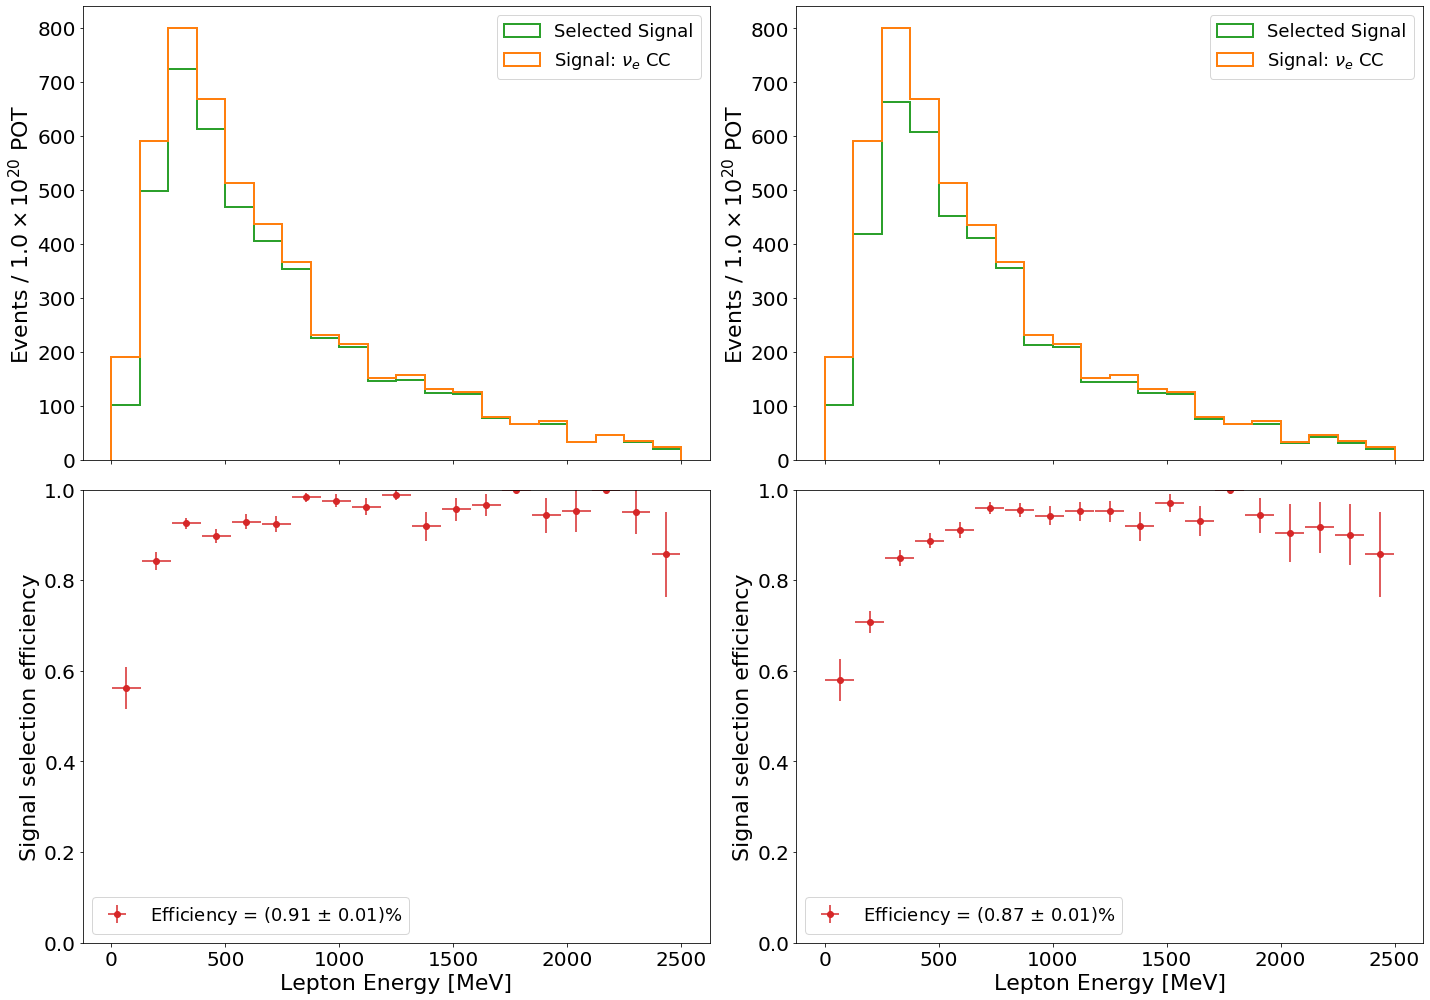

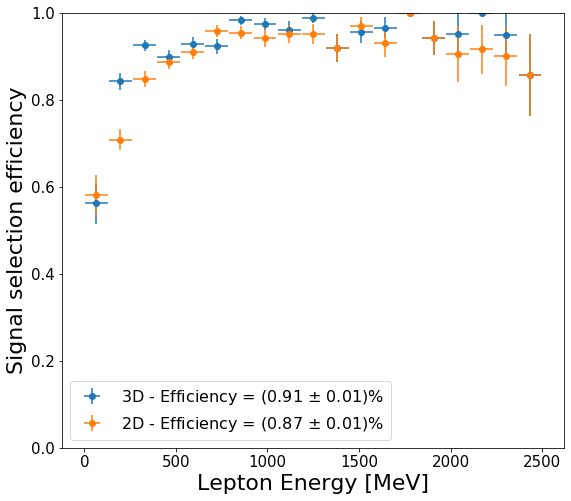

Plotting nue_cc with variable lep_costheta
Overall efficiency - 3D: 0.9094397544128934
Overall efficiency - 2D: 0.872168905950096


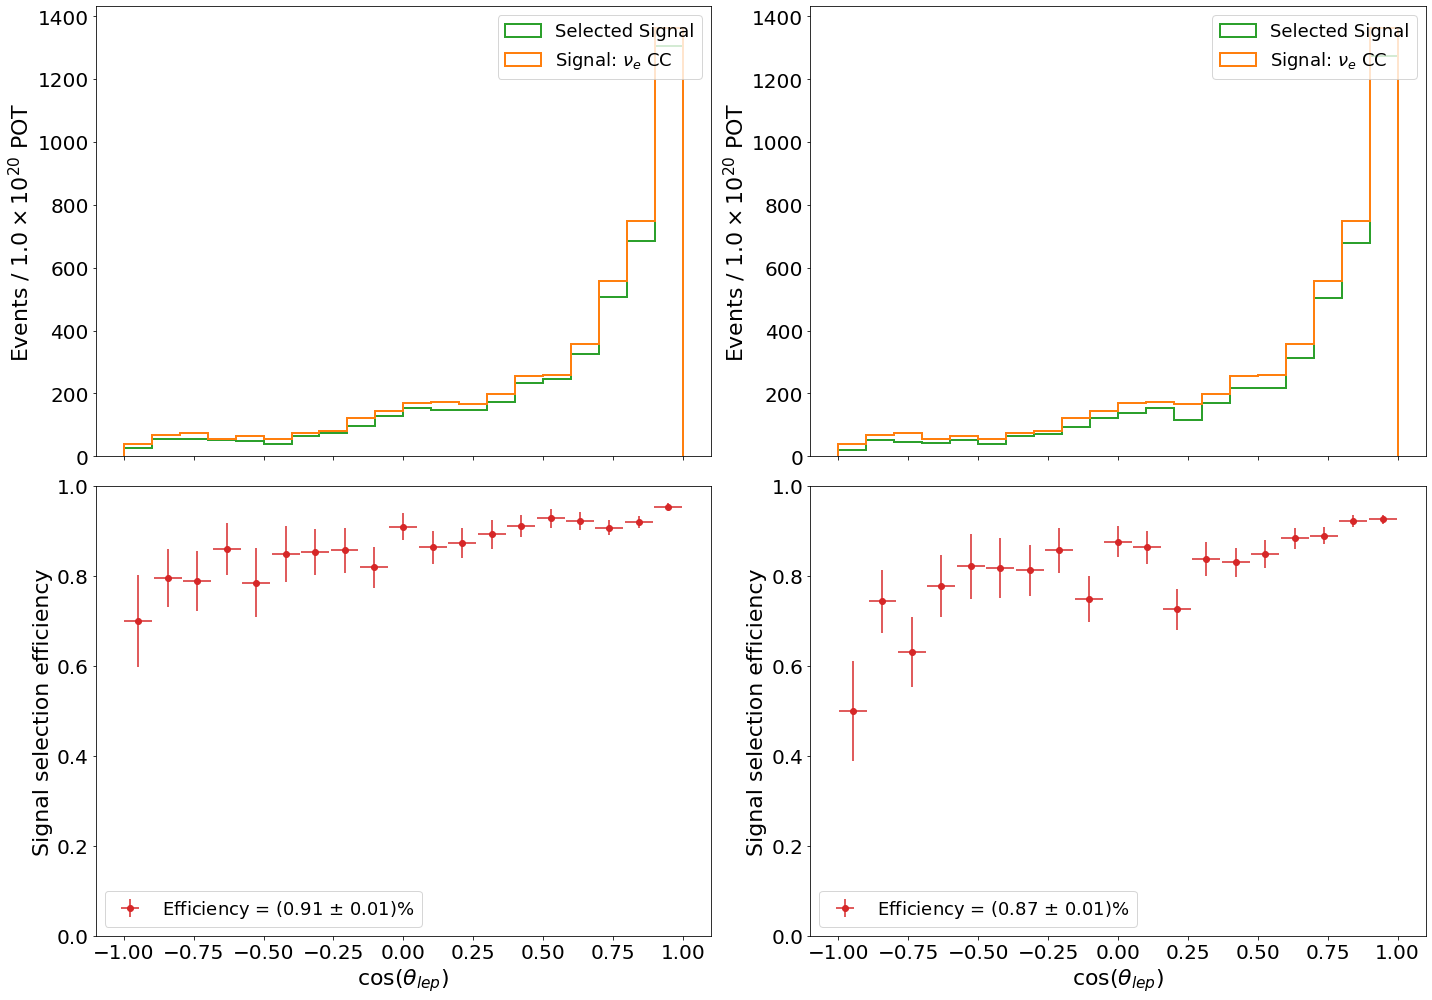

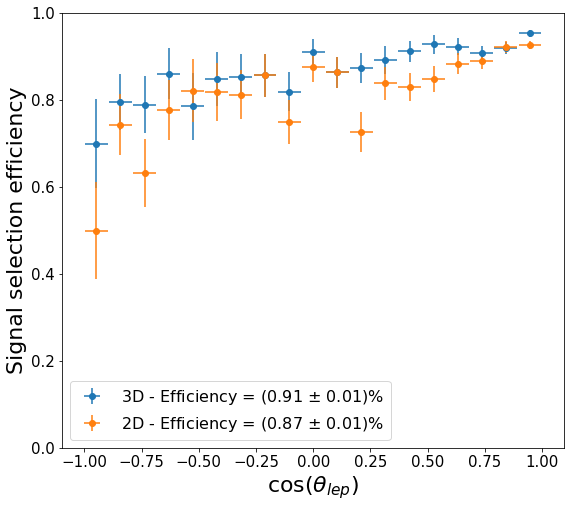

In [5]:
# https://stackoverflow.com/questions/35988/c-like-structures-in-python/31062667
from dataclasses import dataclass

@dataclass
class Variable:
    variable: str = 'lep_e'
    xlabel: str = 'Lepton Energy [MeV]'
    x_1: float = 0.0
    x_2: float = 2500.

all_vars = {
    'lep_p':               Variable(variable = 'lep_e', xlabel = 'Lepton Energy [MeV]', x_1 = 0.0, x_2 = 2500.),
    'lep_costheta':        Variable(variable = 'lep_costheta', xlabel = 'cos($\\theta_{lep}$)', x_1 = -1., x_2 = 1.),
    'lead_prot_p':         Variable(variable = 'lead_prot_p', xlabel = 'Leading Proton Momentum [MeV]', x_1 = 0., x_2 = 2000.),
    'lead_prot_costheta':  Variable(variable = 'lead_prot_costheta', xlabel = 'Leading Proton cos($\\theta_p$)', x_1 = 0., x_2 = 2000.),
}


categories = [
    {
        'name'       : "nue_cc",
        'signal'     : "true_neutrinoid == 0",
        'signal_sel' : "true_neutrinoid == 0 and pred_neutrinoid == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e$ CC"
    },
    {
        'name'       : "numu_cc",
        'signal'     : "true_neutrinoid == 1",
        'signal_sel' : "true_neutrinoid == 1 and pred_neutrinoid == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_{\mu}$ CC"
    },
    {
        'name'       : "nue_cc_0p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 0",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 0 and pred_neutrinoid == 0 and pred_prot == 0",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta']],
        'label'      : r"$\nu_e CC$, $N_{p} = 0$"
    },
    {
        'name'       : "nue_cc_1p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 1",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 1 and pred_neutrinoid == 0 and pred_prot == 1",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} = 1$"
    },
    {
        'name'       : "nue_cc_2p",
        'signal'     : "true_neutrinoid == 0 and true_prot == 2",
        'signal_sel' : "true_neutrinoid == 0 and true_prot == 2 and pred_neutrinoid == 0 and pred_prot == 2",
        'var'        : [all_vars['lep_p'], all_vars['lep_costheta'], all_vars['lead_prot_p'], all_vars['lead_prot_costheta']],
        'label'      : r"$\nu_e$ CC, $N_{p} > 1$"
    }
]


c = categories[0]
for v in c['var']:
    print ('Plotting', c['name'], 'with variable', v.variable)    
    make_plots(c['name'], c['label'], v, c['signal'], c['signal_sel'], df_3d, df_2d)
